# Analyzing experimental data for donor and NFAs such as HOMO, LUMO, optical bandgaps, and max absorption wavelength in solution and film

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import csv
plt.style.use('ggplot')

In [101]:
# read the data into a pandas dataframe
exp_data  = pd.read_csv("molecular_experimental_optoelectronic_properties.csv")
# inspect the dataframe
exp_data.head() 

,Molecule,Reference,A (acceptor) or D (donor),max abs solution,max abs film,opt bg,HOMO,LUMO
0,2D-PBTCl,Chao_synergistic_2018,D,625.0,627.0,1.72,-5.45,-3.60
1,2D-PBTCl2,Chao_synergistic_2018,D,593.0,642.0,1.66,-5.43,-3.63
2,2FIFIC,Zhang_preparation_2020,A,750.0,817.0,1.38,-5.45,-3.97
3,2T2Se-F,Ding_selenophene_2022,A,694.0,806.0,1.31,-5.52,-3.83
4,2TC-TT-BDTFT,Chen_backbone_2019,D,NaN,NaN,NaN,-5.45,-3.50


In [64]:
exp_data.describe()

,max abs solution,max abs film,opt bg,HOMO,LUMO
count,566.000000,612.000000,648.000000,1457.000000,1455.000000
mean,679.479682,715.147549,1.573577,-5.486019,-3.697388
std,75.500325,92.032169,0.216261,0.194246,0.315506
min,411.000000,416.000000,0.980000,-6.250000,-4.330000
25%,642.250000,653.000000,1.410000,-5.610000,-3.920000
50%,692.500000,721.000000,1.540000,-5.500000,-3.780000
75%,734.000000,789.000000,1.690000,-5.370000,-3.530000
max,835.000000,939.000000,2.340000,-4.700000,-2.700000


It looks like our dataset contains 1457 values for HOMO, 1455 values for LUMO, 648 for optical bandgap, 566 for maximum absorption wavelength in solution, and 612 for maximum absorption wavelength films. 

Lets see which molecules appear the most frequently:


In [65]:
exp_data['Molecule'].value_counts().head(10)

PBDB-T     101
PBDB-TF     85
PTB7-Th     52
ITIC        43
P3HT        34
Y6          30
J71         20
IT-4F       19
IDIC        10
PTQ10        8
Name: Molecule, dtype: int64

The most common molecules are the donors PBDB-T, PBDB-TF (PM6), PTB7-Th (PCE10), and P3HT, and the most common acceptors are ITIC and Y6.

Lets see the distributions of experimetnal values among the reports of the most common molecules.

In [106]:
def plot_homo_lumo(df, label, bins_homo=15, bins_lumo=15):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

 

    ax1.hist(df['HOMO'], bins=bins_homo, color='#86bf91')
    ax1.set_ylabel('Count', labelpad=10, weight='bold', size=16)
    ax1.set_xlabel('HOMO (eV)', labelpad=10, weight='bold', size=16)
    ax1.tick_params(axis = 'x', labelsize=14)
    ax1.tick_params(axis = 'y', labelsize=14)

    ax2.hist(df['LUMO'], bins=bins_lumo, color='#88CCEE')
    ax2.set_ylabel('Count', labelpad=10, weight='bold', size=16)
    ax2.set_xlabel('LUMO (eV)', labelpad=10, weight='bold', size=16)
    ax2.tick_params(axis = 'x', labelsize=14)
    ax2.tick_params(axis = 'y', labelsize=14)
    
    fig.suptitle(label, size=20)
    
    plt.show()

def plot_homo_lumo_sns(df, label, bins_homo=15, bins_lumo=15):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    curve_homo = sns.histplot(data = df, x = 'HOMO', kde=True, 
                 bins=bins_homo, color = '#86bf91', alpha = 0.7,  ax=ax1)

    kdeline = curve_homo.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    mode_idx = np.argmax(ys)
    print("HOMO mode value is: " + str(xs[mode_idx]) + " eV")
    
    ax1.set_ylabel('Count', labelpad=10, weight='bold', size=16)
    ax1.set_xlabel('HOMO (eV)', labelpad=10, weight='bold', size=16)
    ax1.tick_params(axis = 'x', labelsize=14)
    ax1.tick_params(axis = 'y', labelsize=14)
    
    curve_lumo = sns.histplot(data = df, x = 'LUMO', kde=True, 
                 bins=bins_lumo, color = '#88CCEE', alpha = 0.7, ax=ax2)
    kdeline = curve_lumo.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    mode_idx = np.argmax(ys)
    print("LUMO mode value is: " + str(xs[mode_idx]) + " eV")
    
    ax2.set_ylabel('Count', labelpad=10, weight='bold', size=16)
    ax2.set_xlabel('LUMO (eV)', labelpad=10, weight='bold', size=16)
    ax2.tick_params(axis = 'x', labelsize=14)
    ax2.tick_params(axis = 'y', labelsize=14)
    
    fig.suptitle(label, size=20)
    
    filename_pdf = label + '_homolumo.pdf'
    plt.savefig(filename_pdf, dpi=600)
    filename_png = label + '_homolumo.png'
    plt.savefig(filename_png, dpi=600)
    
    plt.show()   

def plot_optical_sns(df, label, bins_abs_sol=15, bins_abs_film=15, bins_optbg=15):
    
    props = ['max abs solution', 'max abs film', 'opt bg']
    tracking = []
    for x in props:
        if df[x].notna().sum() > 0:
            tracking.append(x)
    fig, axs = plt.subplots(1, len(tracking), figsize=(20, 5))

    for i in range(len(tracking)):
        if tracking[i] == 'max abs solution':
            curve = sns.histplot(data = df, x = 'max abs solution', kde=True, bins=bins_abs_sol, color = '#332288', alpha = 0.7, ax=axs[i])
            kdeline = curve.lines[0]
            xs = kdeline.get_xdata()
            ys = kdeline.get_ydata()
            mode_idx = np.argmax(ys)
            print("max abs wavelength for solutions mode value is: " + str(xs[mode_idx]) + " nm")
            
            axs[i].set_ylabel('Count', labelpad=10, weight='bold', size=16)
            axs[i].set_xlabel('Max. Abs. Wavelength for Solution (nm) ', labelpad=10, weight='bold', size=16)
            axs[i].tick_params(axis = 'x', labelsize=14)
            axs[i].tick_params(axis = 'y', labelsize=14)
            
        elif tracking[i] == 'max abs film':
            
            curve = sns.histplot(data = df, x = 'max abs film', kde=True, bins=bins_abs_film, color = '#CAB23F', alpha = 0.7, ax=axs[i])
            kdeline = curve.lines[0]
            xs = kdeline.get_xdata()
            ys = kdeline.get_ydata()
            mode_idx = np.argmax(ys)
            print("max abs wavelength for film mode value is: " + str(xs[mode_idx]) + " nm")

            axs[i].set_ylabel('Count', labelpad=10, weight='bold', size=16)
            axs[i].set_xlabel('Max. Abs. Wavelength for Film (nm)', labelpad=10, weight='bold', size=16)
            axs[i].tick_params(axis = 'x', labelsize=14)
            axs[i].tick_params(axis = 'y', labelsize=14)
            
        elif tracking[i] == 'opt bg':
            curve = sns.histplot(data = df, x = 'opt bg', kde=True, bins=bins_optbg, color = '#882255', alpha = 0.7, facecolor='#63173D', ax=axs[i])
            kdeline = curve.lines[0]
            xs = kdeline.get_xdata()
            ys = kdeline.get_ydata()
            mode_idx = np.argmax(ys)
            print("optical band gap mode value is: " + str(xs[mode_idx]) + " eV")
            
            axs[i].hist(df['opt bg'], bins=bins_optbg, color='#882255')
            axs[i].set_ylabel('Count', labelpad=10, weight='bold', size=16)
            axs[i].set_xlabel('Optical Band Gap (eV)', labelpad=10, weight='bold', size=16, color='black')
            axs[i].tick_params(axis = 'x', labelsize=14)
            axs[i].tick_params(axis = 'y', labelsize=14)

    filename_pdf = label + 'optical.pdf'
    plt.savefig(filename_pdf, dpi=600)
    filename_png = label + 'optical.png'
    plt.savefig(filename_png, dpi=600)
    
    fig.suptitle(label, size=20)
    plt.show()
    
    
def plot_optical(df, label, bins_abs_sol=15, bins_abs_film=15, bins_optbg=15):
    
    props = ['max abs solution', 'max abs film', 'opt bg']
    tracking = []
    for x in props:
        if df[x].notna().sum() > 0:
            tracking.append(x)
    fig, axs = plt.subplots(1, len(tracking), figsize=(20, 5))

    for i in range(len(tracking)):
        if tracking[i] == 'max abs solution':
            axs[i].hist(df['max abs solution'], bins=bins_abs_sol, color='#332288')
            axs[i].set_ylabel('Count', labelpad=10, weight='bold', size=16)
            axs[i].set_xlabel('Max. Abs. Wavelength for Solution (nm) ', labelpad=10, weight='bold', size=16)
            axs[i].tick_params(axis = 'x', labelsize=14)
            axs[i].tick_params(axis = 'y', labelsize=14)
            
        elif tracking[i] == 'max abs film':
            axs[i].hist(df['max abs film'], bins=bins_abs_film, color='#CAB23F')
            axs[i].set_ylabel('Count', labelpad=10, weight='bold', size=16)
            axs[i].set_xlabel('Max. Abs. Wavelength for Film (nm)', labelpad=10, weight='bold', size=16)
            axs[i].tick_params(axis = 'x', labelsize=14)
            axs[i].tick_params(axis = 'y', labelsize=14)
            
        elif tracking[i] == 'opt bg':

            axs[i].hist(df['opt bg'], bins=bins_optbg, color='#882255')
            axs[i].set_ylabel('Count', labelpad=10, weight='bold', size=16)
            axs[i].set_xlabel('Optical Band Gap (eV)', labelpad=10, weight='bold', size=16, color='black')
            axs[i].tick_params(axis = 'x', labelsize=14)
            axs[i].tick_params(axis = 'y', labelsize=14)

    fig.suptitle(label, size=20)
    plt.show()

## PBDB-T

In [107]:
# create a query mask for PBDB-T
query_mask = exp_data['Molecule'] == "PBDB-T"
PBDB_T = exp_data[query_mask]
PBDB_T.head()

,Molecule,Reference,A (acceptor) or D (donor),max abs solution,max abs film,opt bg,HOMO,LUMO
861,PBDB-T,Aldrich_enhancing_2017,D,NaN,NaN,NaN,-5.52,-3.68
862,PBDB-T,An_energy_2018,D,NaN,NaN,NaN,-5.31,-3.51
863,PBDB-T,Cao_asymmetric_2021,D,NaN,NaN,NaN,-5.23,-3.18
864,PBDB-T,Chang_fine-tuning_2018,D,NaN,NaN,NaN,-5.33,-2.92
865,PBDB-T,Chang_isomerically_2019,D,NaN,NaN,NaN,-5.36,-3.54


HOMO mode value is: -5.326834170854271 eV
LUMO mode value is: -3.482211055276382 eV


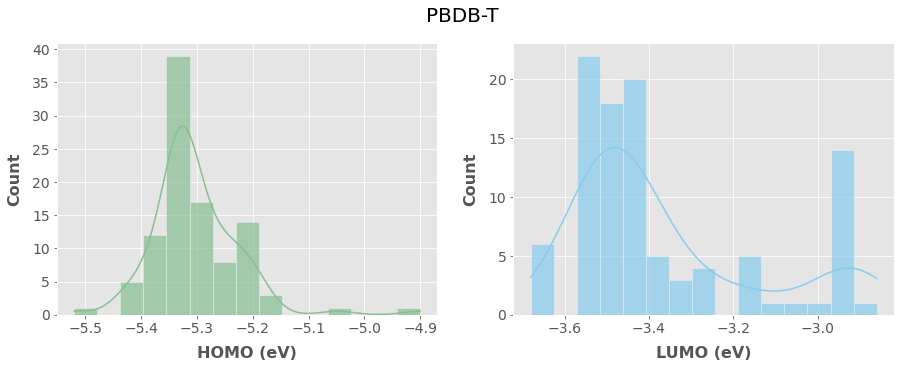

In [108]:
plot_homo_lumo_sns(PBDB_T, 'PBDB-T', bins_homo=15, bins_lumo=15)


max abs wavelength for solutions mode value is: 622.4974874371859 nm
max abs wavelength for film mode value is: 625.9849246231156 nm
optical band gap mode value is: 1.8398994974874372 eV


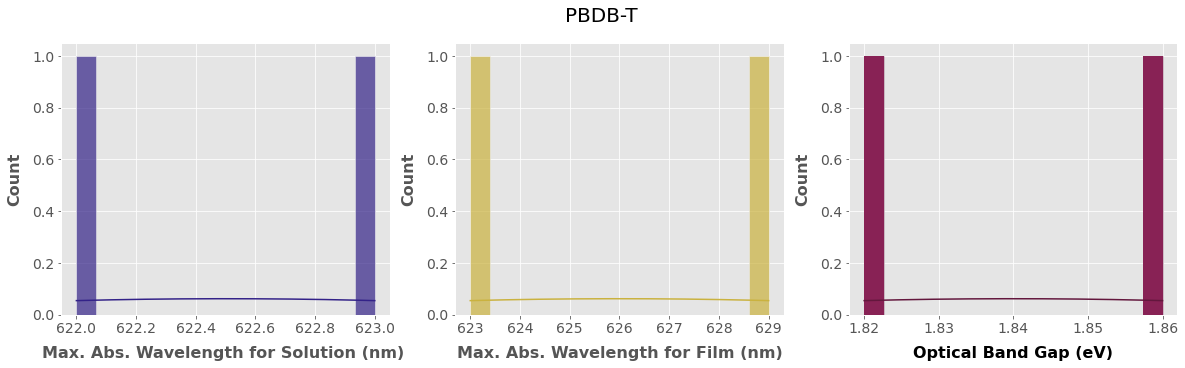

In [109]:
plot_optical_sns(PBDB_T, 'PBDB-T')

## PM6

In [110]:
query_mask = exp_data['Molecule'] == "PBDB-TF"
PBDB_TF = exp_data[query_mask]
PBDB_TF.head()

,Molecule,Reference,A (acceptor) or D (donor),max abs solution,max abs film,opt bg,HOMO,LUMO
970,PBDB-TF,An_ternary_2019,D,NaN,NaN,NaN,-5.45,-3.65
971,PBDB-TF,Chen_a chlorinated_2020,D,NaN,NaN,NaN,-5.56,-3.50
972,PBDB-TF,Liu_achieving high performance_2019,D,NaN,NaN,NaN,-5.45,-3.65
973,PBDB-TF,Wang_nonacyclic_2019,D,NaN,NaN,NaN,-5.45,-3.65
974,PBDB-TF,Aldrich_enhancing_2017,D,NaN,NaN,NaN,-5.66,-3.81


HOMO mode value is: -5.489748743718593 eV
LUMO mode value is: -3.637537688442211 eV


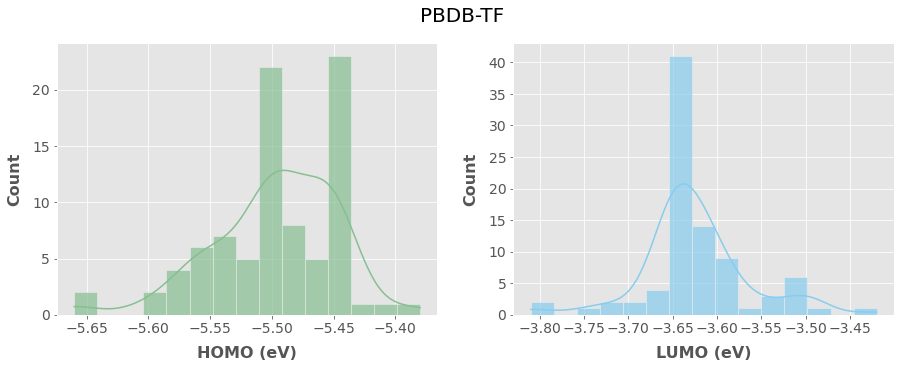

In [111]:
plot_homo_lumo_sns(PBDB_TF, 'PBDB-TF', bins_homo=15, bins_lumo=15)

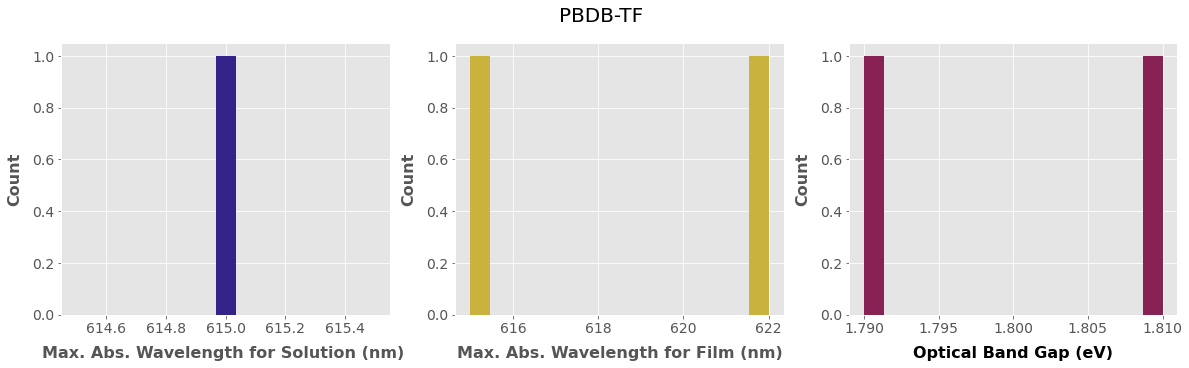

In [112]:
plot_optical(PBDB_TF, 'PBDB-TF')

## PTB7-Th

In [113]:
query_mask = exp_data['Molecule'] == "PTB7-Th"
PTB7_Th = exp_data[query_mask]
PTB7_Th.head()

,Molecule,Reference,A (acceptor) or D (donor),max abs solution,max abs film,opt bg,HOMO,LUMO
1199,PTB7-Th,Ahn_simple_2019,D,NaN,NaN,NaN,-5.34,-3.74
1200,PTB7-Th,Bai_efficient_2018,D,NaN,NaN,NaN,-5.15,-3.44
1201,PTB7-Th,Cao_design_2017,D,NaN,NaN,NaN,-5.20,-3.56
1202,PTB7-Th,Chao_synergistic_2018,D,NaN,NaN,NaN,-5.38,-3.70
1203,PTB7-Th,Chen_highly_2019,D,NaN,NaN,NaN,-5.30,-3.33


HOMO mode value is: -5.212160804020101 eV
LUMO mode value is: -3.604824120603015 eV


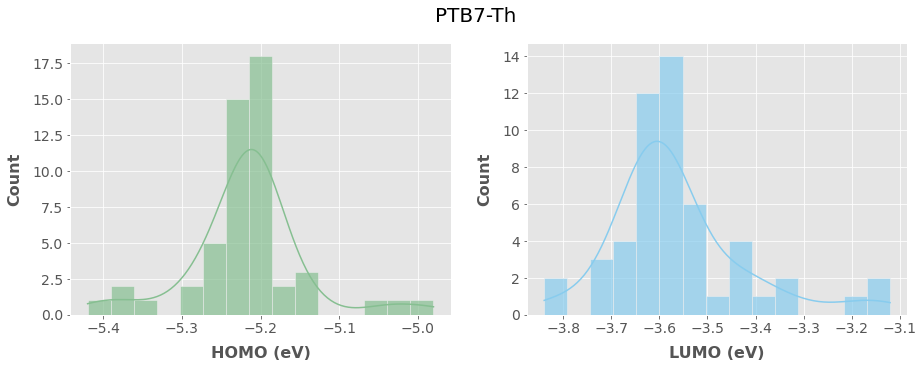

In [114]:
plot_homo_lumo_sns(PTB7_Th, 'PTB7-Th', bins_homo=15, bins_lumo=15)

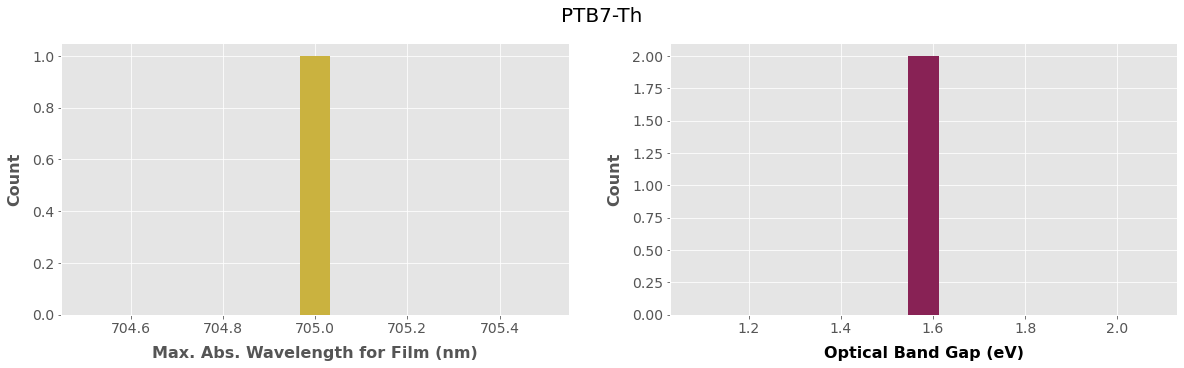

In [115]:
plot_optical(PTB7_Th, 'PTB7-Th')

## ITIC

In [116]:
query_mask = exp_data['Molecule'] == "ITIC"
ITIC = exp_data[query_mask]
ITIC.head()

,Molecule,Reference,A (acceptor) or D (donor),max abs solution,max abs film,opt bg,HOMO,LUMO
555,ITIC,An_nonhalogen_2018,A,NaN,NaN,NaN,-5.51,-3.84
556,ITIC,Bao_high_2017,A,NaN,NaN,NaN,-5.63,-3.97
557,ITIC,Bauer_donor_2017,A,NaN,NaN,NaN,-5.64,-4.04
558,ITIC,Bin_11.4%_2016,A,NaN,NaN,NaN,-5.51,-3.84
559,ITIC,Chang_isomerically_2019,A,664.0,705.0,1.59,-5.61,-4.01


HOMO mode value is: -5.212160804020101 eV
LUMO mode value is: -3.604824120603015 eV


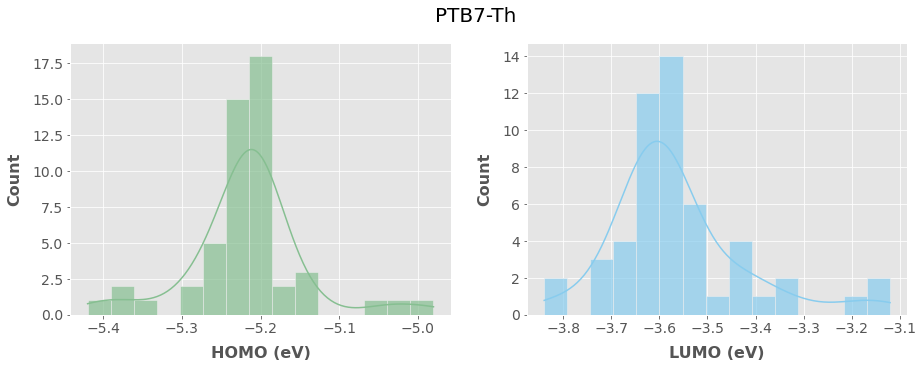

In [117]:
plot_homo_lumo_sns(PTB7_Th, 'PTB7-Th', bins_homo=15, bins_lumo=15)

max abs wavelength for solutions mode value is: 677.7939698492462 nm
max abs wavelength for film mode value is: 705.1356783919598 nm
optical band gap mode value is: 1.5911557788944724 eV


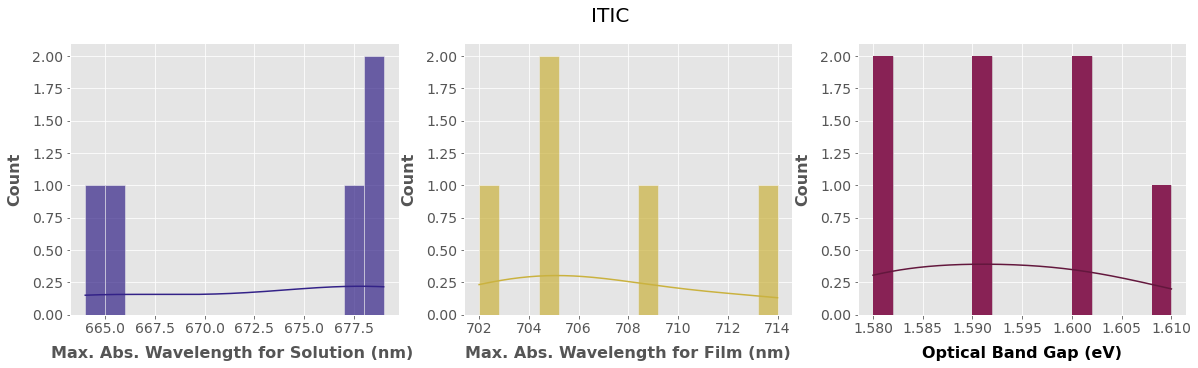

In [118]:
plot_optical_sns(ITIC, 'ITIC', bins_abs_sol=15, bins_abs_film=15, bins_optbg=15)

## Y6

In [119]:
query_mask = exp_data['Molecule'] == "Y6"
Y6 = exp_data[query_mask]
Y6.head()

,Molecule,Reference,A (acceptor) or D (donor),max abs solution,max abs film,opt bg,HOMO,LUMO
1404,Y6,Chao_enhanced_2020,A,NaN,NaN,NaN,-5.65,-4.10
1405,Y6,Chen_alkoxy_2021,A,733.0,826.0,1.37,-5.71,-3.89
1406,Y6,Chen_all-small-molecule_2019,A,NaN,NaN,NaN,-5.65,-4.10
1407,Y6,Chen_asymmetric_2021,A,732.0,NaN,1.35,-5.71,-3.89
1408,Y6,Ding_boosting_2021,A,NaN,NaN,NaN,-5.60,-4.10


HOMO mode value is: -5.646432160804021 eV
LUMO mode value is: -4.09035175879397 eV


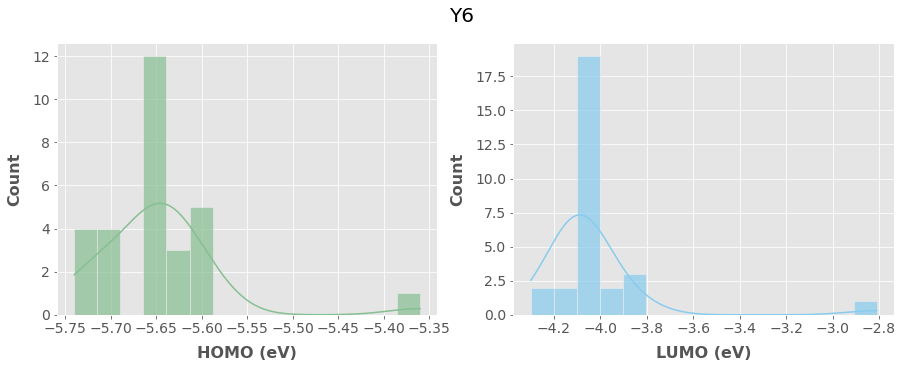

In [120]:
plot_homo_lumo_sns(Y6, 'Y6', bins_homo=15, bins_lumo=15)

max abs wavelength for solutions mode value is: 731.8391959798995 nm
max abs wavelength for film mode value is: 826.4221105527638 nm
optical band gap mode value is: 1.358743718592965 eV


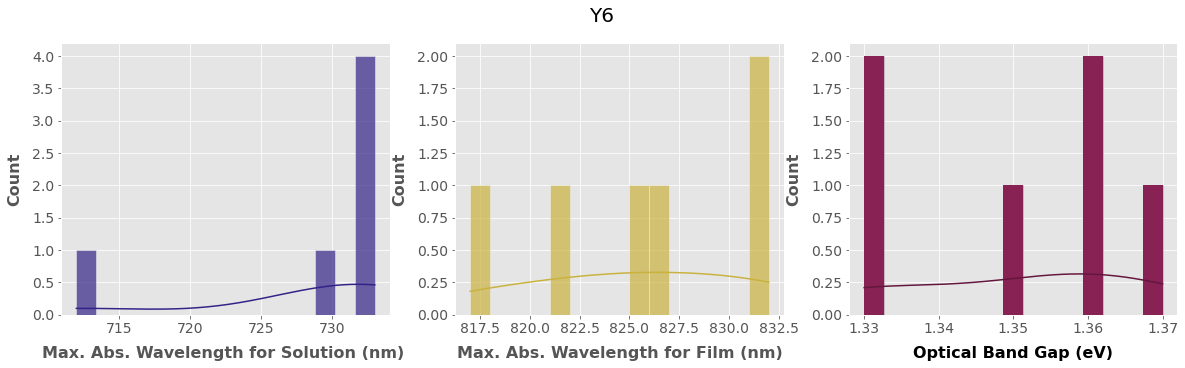

In [121]:
plot_optical_sns(Y6, 'Y6', bins_abs_sol=15, bins_abs_film=15, bins_optbg=15)

## P3HT

In [122]:
query_mask = exp_data['Molecule'] == "P3HT"
P3HT = exp_data[query_mask]
P3HT.head()

,Molecule,Reference,A (acceptor) or D (donor),max abs solution,max abs film,opt bg,HOMO,LUMO
809,P3HT,Ahn_simple_2019,D,NaN,NaN,NaN,-5.14,-3.14
810,P3HT,Baran_reducing_2017,D,NaN,NaN,NaN,-5.10,-3.20
811,P3HT,Chatterjee_naphtho_2016,D,NaN,NaN,NaN,-4.72,-2.81
812,P3HT,Do_9-fluorenone_2017,D,NaN,NaN,NaN,-5.20,-3.20
813,P3HT,Do_molecular_2017,D,NaN,NaN,NaN,-5.20,-3.20


HOMO mode value is: -5.009045226130653 eV
LUMO mode value is: -3.1190954773869346 eV


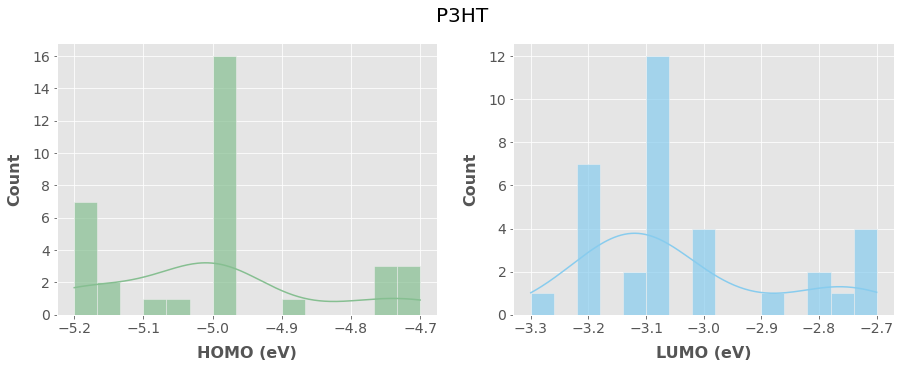

In [123]:
plot_homo_lumo_sns(P3HT, 'P3HT', bins_homo=15, bins_lumo=15)

C:\Users\bripe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


IndexError: list index out of range

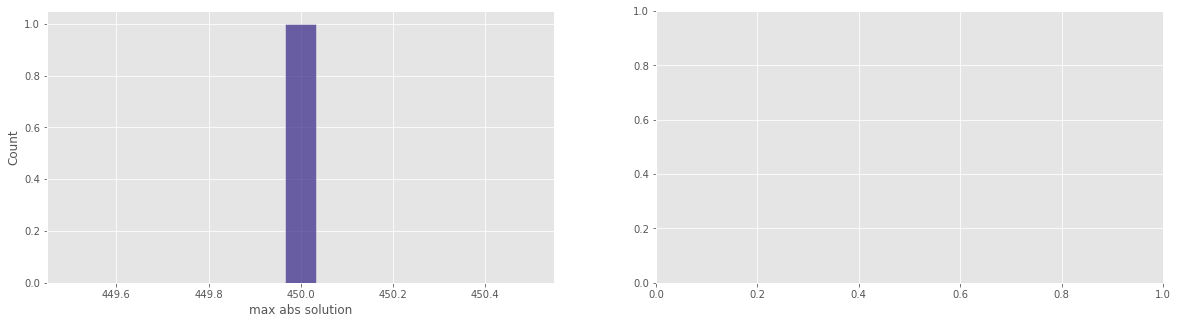

In [273]:
plot_optical_sns(P3HT, 'P3HT', bins_abs_sol=15, bins_abs_film=15, bins_optbg=15)

34


# Adding column of experimetnal values to csv

In [3]:
exp_data

,Molecule,Reference,A (acceptor) or D (donor),max abs solution,max abs film,opt bg,HOMO,LUMO
0,2D-PBTCl,Chao_synergistic_2018,D,625.0,627.0,1.72,-5.45,-3.60
1,2D-PBTCl2,Chao_synergistic_2018,D,593.0,642.0,1.66,-5.43,-3.63
2,2FIFIC,Zhang_preparation_2020,A,750.0,817.0,1.38,-5.45,-3.97
3,2T2Se-F,Ding_selenophene_2022,A,694.0,806.0,1.31,-5.52,-3.83
4,2TC-TT-BDTFT,Chen_backbone_2019,D,NaN,NaN,NaN,-5.45,-3.50
...,...,...,...,...,...,...,...,...
1453,ZITI-N,Zhang_accurate_2020,A,NaN,NaN,NaN,-5.53,-3.82
1454,ZITI-N,Zhang_revealing_2019,A,NaN,NaN,NaN,-5.60,-3.81
1455,ZITI-S,Zhang_accurate_2020,A,NaN,NaN,NaN,-5.80,-3.87
1456,ZITI-S,Zhang_revealing_2019,A,NaN,NaN,NaN,-5.80,-3.87


In [99]:
with open('molecule_exp_data.csv', mode='w') as molecule_file:
    molecule_writer = csv.writer(molecule_file)
    molecule_writer.writerow(['Molecule', 'AorD', 'HOMO', 'LUMO', 'optbg', 'wavelength_film', 'wavelength_soln'])

molecules = list(pd.unique(exp_data['Molecule']))

for x in molecules:
    HOMO = None
    LUMO = None
    optbg = None
    wavelength_film = None
    wavelength_soln = None
    
    query_mask = exp_data['Molecule'] == x
    df = exp_data[query_mask]
    size = len(df)
    
    name = x
    AorD = exp_data.iloc[exp_data[exp_data['Molecule']==x].index.values[0], 2]
    
    if size == 1:
        wavelength_soln = df.iloc[0, 3]
        wavelength_film = df.iloc[0, 4]
        optbg = df.iloc[0, 5]
        HOMO = df.iloc[0, 6]
        LUMO = df.iloc[0, 7]
        
            
    else:
        print(x)
        
        if len(pd.unique(df['HOMO'])) == 1:
            HOMO = pd.unique(df['HOMO'])[0]
        elif len(df[df['HOMO'].notnull()]) == 1:
            not_null = df[df['HOMO'].notnull()]
            HOMO = not_null.iloc[0, 6]
            
        elif len(df[df['HOMO'].notnull()]) > 1:
            not_null = df[df['HOMO'].notnull()]
            if len(pd.unique(not_null['HOMO'])) == 1:
                HOMO = pd.unique(not_null['HOMO'])[0]
            else:
                curve = sns.histplot(data = df, x = 'HOMO', kde=True, bins=25)
                kdeline = curve.lines[0]
                xs = kdeline.get_xdata()
                ys = kdeline.get_ydata()
                mode_idx = np.argmax(ys)
                HOMO = xs[mode_idx].round(2)
                plt.close()
            
        if len(pd.unique(df['LUMO'])) == 1:
            LUMO = pd.unique(df['LUMO'])[0]
        elif len(df[df['LUMO'].notnull()]) == 1:
            not_null = df[df['LUMO'].notnull()]
            LUMO = not_null.iloc[0, 7]
        elif len(df[df['LUMO'].notnull()]) > 1:
            not_null = df[df['LUMO'].notnull()]
            if len(pd.unique(not_null['LUMO'])) == 1:
                LUMO = pd.unique(not_null['LUMO'])[0]
            else:
                curve = sns.histplot(data = df, x = 'LUMO', kde=True, bins=25)
                kdeline = curve.lines[0]
                xs = kdeline.get_xdata()
                ys = kdeline.get_ydata()
                mode_idx = np.argmax(ys)
                LUMO = xs[mode_idx].round(2)
                plt.close()
         
        if len(pd.unique(df['max abs solution'])) == 1:
            wavelength_soln = pd.unique(df['max abs solution'])[0]
        elif len(df[df['max abs solution'].notnull()]) == 1:
            not_null = df[df['max abs solution'].notnull()]
            wavelength_soln = not_null.iloc[0, 3]
        elif len(df[df['max abs solution'].notnull()]) > 1:
            not_null = df[df['max abs solution'].notnull()]
            if len(pd.unique(not_null['max abs solution'])) == 1:
                wavelength_soln = pd.unique(not_null['max abs solution'])[0]
            else:
                curve = sns.histplot(data = df, x = 'max abs solution', kde=True, bins=25)
                kdeline = curve.lines[0]
                xs = kdeline.get_xdata()
                ys = kdeline.get_ydata()
                mode_idx = np.argmax(ys)
                wavelength_soln = xs[mode_idx].round(2)
                plt.close()
        
        if len(pd.unique(df['max abs film'])) == 1:
            wavelength_film = pd.unique(df['max abs film'])[0]
        elif len(df[df['max abs film'].notnull()]) == 1:
            not_null = df[df['max abs film'].notnull()]
            wavelength_film = not_null.iloc[0, 4]
        elif len(df[df['max abs film'].notnull()]) > 1:
            not_null = df[df['max abs film'].notnull()]
            if len(pd.unique(not_null['max abs film'])) == 1:
                wavelength_film = pd.unique(not_null['max abs film'])[0]
            else:
                curve = sns.histplot(data = df, x = 'max abs film', kde=True, bins=25)
                kdeline = curve.lines[0]
                xs = kdeline.get_xdata()
                ys = kdeline.get_ydata()
                mode_idx = np.argmax(ys)
                wavelength_film = xs[mode_idx].round(2)
                plt.close()
        
        if len(pd.unique(df['opt bg'])) == 1:
            optbg = pd.unique(df['opt bg'])[0]
        elif len(df[df['opt bg'].notnull()]) == 1:
            not_null = df[df['opt bg'].notnull()]
            optbg = not_null.iloc[0, 5]
        elif len(df[df['opt bg'].notnull()]) > 1:
            not_null = df[df['opt bg'].notnull()]
            if len(pd.unique(not_null['opt bg'])) == 1:
                optbg = pd.unique(not_null['opt bg'])[0]
            else:
                curve = sns.histplot(data = df, x = 'opt bg', kde=True, bins=25)
                kdeline = curve.lines[0]
                xs = kdeline.get_xdata()
                ys = kdeline.get_ydata()
                mode_idx = np.argmax(ys)
                optbg = xs[mode_idx].round(2)
                plt.close()

    
    values = [name, AorD, HOMO, LUMO, optbg, wavelength_film, wavelength_soln]
    with open('molecule_exp_data.csv', 'a') as file:
        writer = csv.writer(file)
        writer.writerow(values)

BO-4Cl
BTA1
BTA3
BT-CIC
-5.49
BTP-4Cl
BTP-4F
BTR
-5.34
Coi8DFIC
DICTF
-5.67
DTCC-IC
F-2Cl
FBR
FDICTF
-5.43
FDNCTF
F-H
FOIC
FTAZ
HFQx-T
IC-C6IDT-IC
-5.69
IDIC
IDIC-4Cl
IDT-2BM
IDT-2BR
-5.52
IDTBR
IDT-IC
IDTN
IDTT-T
-5.51
IEIC
IEICO
-5.32
INPIC-4F
-5.42
IOIC2
-5.41
IPT-2F
-5.51
IT-4Cl
-5.75
IT-4F
ITCC-M
ITCPTC
IT-DM
ITIC
ITIC1
-5.48
ITIC-2F
ITIC-4F
ITIC-Th
-5.66
IT-M
J51
-5.29
J52
J52-Cl
-5.39
J61
J71
MeIC
m-ITIC
-5.52
N2200
NFBDT
O-IDTBR
P
P3HT
PBDB-T
PBDB-T-2Cl
PBDB-TF
PBDB-T-SF
PBT1-C
PBTA-BO
-5.31
PBTB-TF
PBT-F
-5.39
PBZ
-5.18
PDCBT
PDCBT-2F
PF2-DTC
-5.76
PFBZ
-5.36
PffBT4T-2DT
PTB7
PTB7-Th
PTQ10
SFBRCN
-5.93
SM1
TTFQx-T1
-5.31
TTIC
Y1
-5.45
Y5
-5.55
Y6
Y6-Se
ZITI
ZITI-N
ZITI-S
-5.8
